In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import random



In [ ]:

random.seed(55)
p=0.3
df_train=pd.read_csv('train_data.csv',header=0,skiprows=lambda i:i>0 and random.random()>p, sep='|')




firstc=pd.get_dummies(df_train['creat_type_cd'])
firstc=firstc.drop([2,9,4,5],axis=1)


df_train=df_train.drop('creat_type_cd',axis=1)

df_train=pd.concat([df_train,firstc],axis=1)



class_app=pd.get_dummies(df_train['app_first_class'])
df_train=df_train.drop('app_first_class',axis=1)
df_train=pd.concat([class_app,df_train],axis=1)


ages=pd.get_dummies(df_train['age'])
df_train=df_train.drop('age',axis=1)
df_train=pd.concat([ages,df_train],axis=1)

In [2]:
import seaborn as sns

In [3]:
random.seed(54)
p=0.01
c_val=pd.read_csv('train_data.csv',header=0,skiprows=lambda i:i>0 and random.random()>p, sep='|')

In [4]:
##sns.heatmap(df_train.corr())

In [5]:
X=df_train.drop(['label'],axis=1)
y=df_train['label']



In [6]:
X_cval=c_val.drop(['communication_onlinerate','label','uid'],axis=1)
Y_cval=c_val['label']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(sampling_strategy=0.35)
X_res,y_res=os.fit_sample(X,y)

In [ ]:
X_res=X_res.values
y_res=y_res.values

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_res=scaler.fit_transform(X_res)

X_cval=scaler.transform(X_cval)

In [ ]:
##X_train.shape

In [ ]:
##_test.shape

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model=Sequential()
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x=X_res,y=y_res, epochs=10,verbose=1, batch_size=1000)

In [ ]:
import tensorflow

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
hist=pd.DataFrame(model.history.history)
plt.plot(hist)

In [ ]:
model.save('my_model_initialize.h5')

In [ ]:
predictions=model.predict_classes(X_cval)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_cval,predictions))
print('\n')
print(confusion_matrix(Y_cval,predictions))

In [13]:
import tensorflow

In [5]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(sampling_strategy=0.35)

In [6]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

In [14]:
chunksize=10**6
beta = 0.9
weightsf = []
for i, chunk in  enumerate(pd.read_csv('train_data.csv', chunksize=chunksize,sep='|')):
    X=chunk.drop(['communication_onlinerate','label','uid'],axis=1)
    y=chunk['label']
    
    X_res1,y_res1=os.fit_sample(X,y)
    X_res1=X_res1.values
    y_res1=y_res1.values
    
    X_res1=scaler.fit_transform(X_res1)
    if i==0:
        model=tensorflow.keras.models.load_model('my_model_initialize.h5')
        weightsi = np.array(model.get_weights())
        
    if i>0:
        model=tensorflow.keras.models.load_model('my_model.h5')
    
    
    model.set_weights(weightsi)
    layer1=model.layers[0]
    layer1.trainable=False
    
    layer2=model.layers[1]
    layer2.trainable=False
    
    model.fit(x=X_res1,y=y_res1, epochs=7,verbose=1, batch_size=512)
    weightsf.append((np.array(model.get_weights())))
    
    
    model.save('my_model.h5')
    
    

Epoch 1/7
2538/2538 [==============================] - 6s 2ms/step - loss: 0.4982 - accuracy: 0.7677
Epoch 2/7
2538/2538 [==============================] - 6s 2ms/step - loss: 0.4763 - accuracy: 0.7760
Epoch 3/7
2538/2538 [==============================] - 6s 2ms/step - loss: 0.4611 - accuracy: 0.7820
Epoch 4/7
2538/2538 [==============================] - 6s 2ms/step - loss: 0.4490 - accuracy: 0.7876
Epoch 5/7
2538/2538 [==============================] - 6s 3ms/step - loss: 0.4397 - accuracy: 0.7919
Epoch 6/7
2538/2538 [==============================] - 7s 3ms/step - loss: 0.4314 - accuracy: 0.7959
Epoch 7/7
2538/2538 [==============================] - 7s 3ms/step - loss: 0.4245 - accuracy: 0.7993
Epoch 1/7
2537/2537 [==============================] - 5s 2ms/step - loss: 0.5145 - accuracy: 0.7596
Epoch 2/7
2537/2537 [==============================] - 5s 2ms/step - loss: 0.5014 - accuracy: 0.7665
Epoch 3/7
2537/2537 [==============================] - 5s 2ms/step - loss: 0.4938 - accurac

2549/2549 [==============================] - 5s 2ms/step - loss: 0.4965 - accuracy: 0.7719
Epoch 4/7
2549/2549 [==============================] - 5s 2ms/step - loss: 0.4888 - accuracy: 0.7748
Epoch 5/7
2549/2549 [==============================] - 5s 2ms/step - loss: 0.4821 - accuracy: 0.7780
Epoch 6/7
2549/2549 [==============================] - 5s 2ms/step - loss: 0.4761 - accuracy: 0.7823
Epoch 7/7
2549/2549 [==============================] - 5s 2ms/step - loss: 0.4712 - accuracy: 0.7851
Epoch 1/7
2550/2550 [==============================] - 7s 3ms/step - loss: 0.5179 - accuracy: 0.7609
Epoch 2/7
2550/2550 [==============================] - 6s 2ms/step - loss: 0.5049 - accuracy: 0.7689
Epoch 3/7
2550/2550 [==============================] - 6s 2ms/step - loss: 0.4952 - accuracy: 0.7745
Epoch 4/7
2550/2550 [==============================] - 6s 2ms/step - loss: 0.4862 - accuracy: 0.7781
Epoch 5/7
2550/2550 [==============================] - 6s 2ms/step - loss: 0.4790 - accuracy: 0.7814


2545/2545 [==============================] - 6s 2ms/step - loss: 0.4726 - accuracy: 0.7891
Epoch 1/7
2549/2549 [==============================] - 7s 3ms/step - loss: 0.5006 - accuracy: 0.7698
Epoch 2/7
2549/2549 [==============================] - 6s 2ms/step - loss: 0.4915 - accuracy: 0.7736
Epoch 3/7
2549/2549 [==============================] - 6s 2ms/step - loss: 0.4833 - accuracy: 0.7771
Epoch 4/7
2549/2549 [==============================] - 7s 3ms/step - loss: 0.4767 - accuracy: 0.7796
Epoch 5/7
2549/2549 [==============================] - 8s 3ms/step - loss: 0.4714 - accuracy: 0.7824
Epoch 6/7
2549/2549 [==============================] - 7s 3ms/step - loss: 0.4674 - accuracy: 0.7850
Epoch 7/7
2549/2549 [==============================] - 7s 3ms/step - loss: 0.4636 - accuracy: 0.7875
Epoch 1/7
2550/2550 [==============================] - 7s 3ms/step - loss: 0.5035 - accuracy: 0.7688
Epoch 2/7
2550/2550 [==============================] - 7s 3ms/step - loss: 0.4948 - accuracy: 0.7724


2545/2545 [==============================] - 6s 2ms/step - loss: 0.4855 - accuracy: 0.7775
Epoch 5/7
2545/2545 [==============================] - 6s 2ms/step - loss: 0.4800 - accuracy: 0.7798
Epoch 6/7
2545/2545 [==============================] - 7s 3ms/step - loss: 0.4748 - accuracy: 0.7816
Epoch 7/7
2545/2545 [==============================] - 6s 3ms/step - loss: 0.4705 - accuracy: 0.7833
Epoch 1/7
2546/2546 [==============================] - 6s 2ms/step - loss: 0.5121 - accuracy: 0.7637
Epoch 2/7
2546/2546 [==============================] - 6s 2ms/step - loss: 0.5032 - accuracy: 0.7678
Epoch 3/7
2546/2546 [==============================] - 6s 2ms/step - loss: 0.4943 - accuracy: 0.7713
Epoch 4/7
2546/2546 [==============================] - 6s 2ms/step - loss: 0.4865 - accuracy: 0.7745
Epoch 5/7
2546/2546 [==============================] - 6s 2ms/step - loss: 0.4804 - accuracy: 0.7766
Epoch 6/7
2546/2546 [==============================] - 5s 2ms/step - loss: 0.4754 - accuracy: 0.7778


In [15]:
weight = weightsi
for w in weightsf:
    w = np.array(w)
    weight += w 
weight = weight/(len(weightsf)+1)

In [16]:
model_final=tensorflow.keras.models.load_model('my_model.h5')

In [17]:
model_final.set_weights(weight)
model_final.save('my_model_final.h5')

In [18]:
import random
random.seed(69)
p=0.01
df_test=pd.read_csv('train_data.csv',header=0,skiprows=lambda i:i>0 and random.random()>p, sep='|')

In [19]:
df_test=pd.read_csv('test_data_B.csv', sep='|')

id_df = df_test['id']
test_X=df_test.drop(['communication_onlinerate','id','uid'],axis=1).values

test_X=scaler.transform(test_X)


df_test

In [20]:
model=tensorflow.keras.models.load_model('my_model.h5')

In [21]:
pred1=model.predict(test_X)

In [22]:

pred1 = pd.DataFrame(data=pred1, columns=['probability'])
pred1 = pred1.set_index(id_df)


In [23]:
pred1 = pred1.set_index(id_df)


In [24]:
pred1

,probability
id,
1,0.239290
2,0.102041
3,0.150603
4,0.091147
5,0.187177
...,...
999996,0.006240
999997,0.463371
999998,0.078026


In [25]:
import seaborn as sns

In [26]:
pred1.to_csv('submission11171.csv')

C:\Users\91966\anaconda3\envs\gputest\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

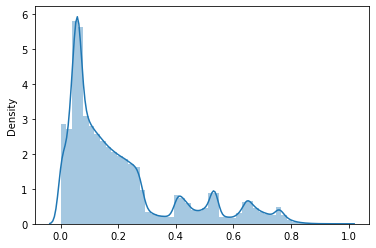

In [27]:
sns.distplot(pred1)

In [28]:
import seaborn as sns

pred1

In [29]:

random.seed(5)
p=0.01
random_data=pd.read_csv('train_data.csv',header=0,skiprows=lambda i:i>0 and random.random()>p, sep='|')

In [30]:
X_random=random_data.drop(['communication_onlinerate','label','uid'],axis=1)
Y_random=random_data['label']

In [31]:
X_random=scaler.transform(X_random)

In [32]:
pred_random=model.predict_classes(X_random)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_random,pred_random))
print('\n')
print(confusion_matrix(Y_random,pred_random))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93    404280
           1       0.06      0.19      0.09     14629

    accuracy                           0.87    418909
   macro avg       0.51      0.54      0.51    418909
weighted avg       0.94      0.87      0.90    418909



[[362065  42215]
 [ 11882   2747]]


In [34]:
pred_random=model_final.predict_classes(X_random)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_random,pred_random))
print('\n')
print(confusion_matrix(Y_random,pred_random))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95    404280
           1       0.07      0.14      0.09     14629

    accuracy                           0.90    418909
   macro avg       0.52      0.54      0.52    418909
weighted avg       0.94      0.90      0.92    418909



[[376509  27771]
 [ 12518   2111]]


In [36]:
pred_final=model_final.predict(test_X)

In [37]:
pred_final = pd.DataFrame(data=pred_final, columns=['probability'])
pred_final = pred_final.set_index(id_df)


In [38]:
pred_final

,probability
id,
1,0.861345
2,0.097352
3,0.093449
4,0.102225
5,0.196346
...,...
999996,0.132607
999997,0.435874
999998,0.093225


C:\Users\91966\anaconda3\envs\gputest\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

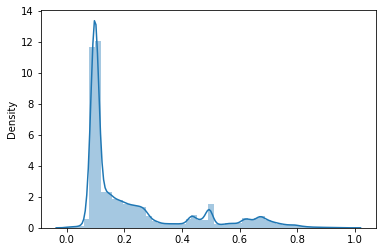

In [39]:
sns.distplot(pred_final)

In [40]:
pred_final.to_csv('submission_finalB.csv')